# MPA-MLF, Lab 6 - Feedforward Neural Networks with regularization techniques and hyperparameter tunning

## Exercise 1 - Classification of an images 

The goal of this task will be to create Multi-layer perceptron model, that is able to recognize the  CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR10 dataset consist of 60000 images with resolution of 32x32 pixels. There are 10 classes in total - *airplane*, *automobile*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship*, *truck*

These is an example of the dataset:

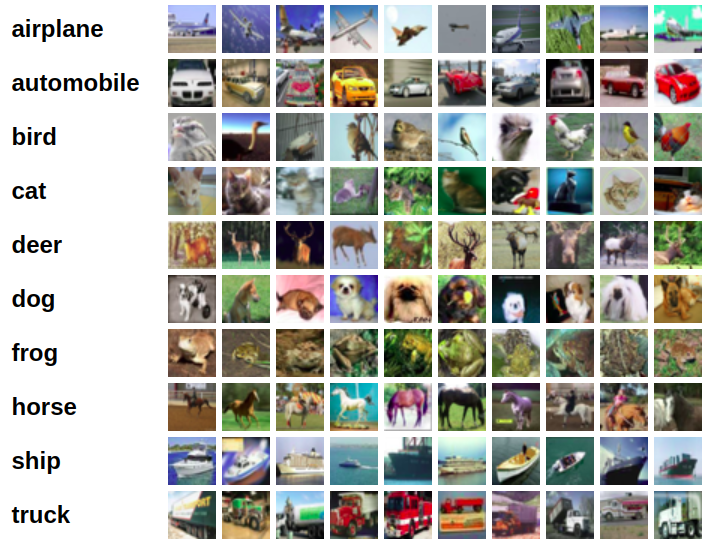

### 0. Import libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Load the Dataset
The dataset is already a part of the Keras library, so we can quickly load it using the following command

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

The following numbered labels represent the labels in the dataset:

In [ ]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

### 2. Data Examination

Fistly, lets have a look and the couple of images we have,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()



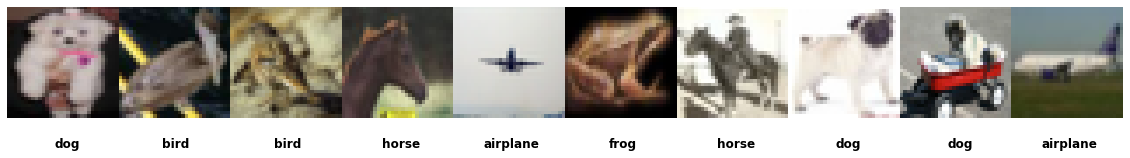

In [ ]:
display_random_images(X_train, y_train)

In [ ]:
#check the shape of image dataset

X_train.shape

(50000, 32, 32, 3)

In our dataset, we have 60000 images with 32x32 resolution. Each image has three channels (R, G, B). We have 50000 images for training and 10000 images for testing. Each channel for each image has values from 0 - 255, where each number represents the pixel intensity. 
With the combination of intensities of R, G and B, you can display up to 16,777,216 different colours (256^3)

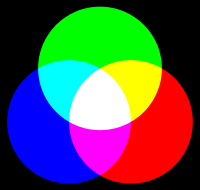

Here you can display each channel separately:

In [ ]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 432x288 with 0 Axes>

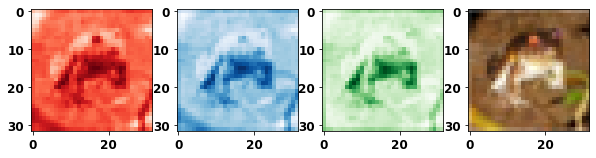

In [ ]:
display_channels_separately(X_train[0])

### 3. Preprocessing of the images

For machine learning purposes, we have to preprocess our images. Firstly we need to scale our images, to scale intensity values from 0-1 (min-max scaling)

In [ ]:
X_train_scaled = X_train.astype('float32') / 255.0

We need to one-hot-encode the labels in our ground truth variable as our second preprocessing.

In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=10)

### 4. Define the model architecture

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

We will define *the Sequential* model as in our last exercise. This time we will use a different approach to determine the input layers. Instead of specifying the *input_dim* parameter in our first hidden layer, we will create a **Flatten** layer that takes our 32x32x3 image and reshapes it into 1x3072. 

We will specify ten neurons in our output layer because we have 10 possible outputs and a **softmax** activation function that returns us a probability distribution over the classes. The class with the highest probability is typically chosen as the predicted class for a given input.

Check the description of our model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


The next step is to compile our model, we will use *categorical_crossentropy* as a loss function, *stochastic gradient descend* as an optimisation and we will be checking *the accuracy* metric.

In [ ]:
optimizer = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### 5. Train the model

Our model will be trained in the same way as in our last pc_labs,

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
313/313 [==============================] - 7s 17ms/step - loss: 2.3362 - accuracy: 0.1125 - val_loss: 2.2798 - val_accuracy: 0.1465
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 2.2665 - accuracy: 0.1620 - val_loss: 2.2570 - val_accuracy: 0.1705
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 2.2452 - accuracy: 0.1860 - val_loss: 2.2365 - val_accuracy: 0.1956
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 2.2260 - accuracy: 0.2088 - val_loss: 2.2180 - val_accuracy: 0.2111
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 2.2082 - accuracy: 0.2244 - val_loss: 2.2011 - val_accuracy: 0.2309
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 2.1917 - accuracy: 0.2385 - val_loss: 2.1850 - val_accuracy: 0.2414
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 2.1765 - accuracy: 0.2468 - val_loss: 2.1705 - val_accuracy: 0.2535
Epoch

### 6. Model evaluation

In [ ]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [ ]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 2.044670820236206
Test accuracy: 31.229999661445618 %


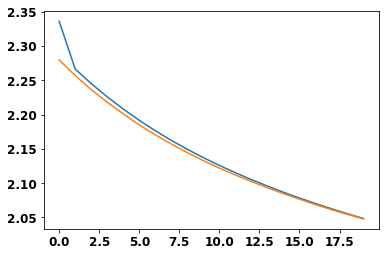

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

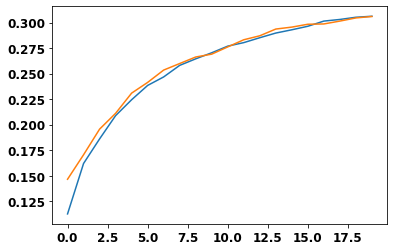

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

As you can see from the evaluation above, we was able to achive approx. 30% of an accuracy. In other word approx. 70% of an images we classified wrongly. That is really bad! 

Lets check the best predictions from our model:

In [ ]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))
  
  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()


313/313 [==============================] - 1s 2ms/step


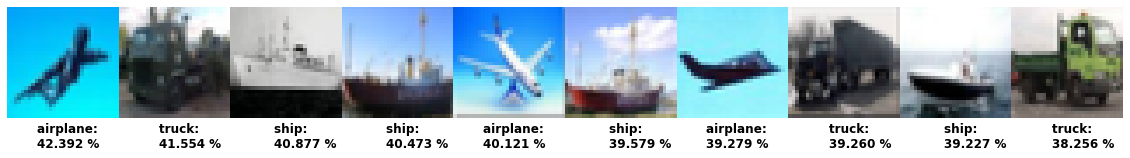

In [ ]:
show_the_best_predictions(model, X_test, y_test)

### Task Description:

You task of this exercise would be to improve the model's performance to achieve better results in image classification task. There is no need to change the preprocessing of the dataset. There are possible way how to improve the models performance:

1. Hyperparameter tunning - change the hyperparameters so that the model will perform better. You can experiment with the following:
 - *changing the number of neurons in the hidden layer*
 - *changing the number of hidden layers*
 - *changing the activation functions*
 - *changing the learning rate*
 - *changing the optimizer* - So far, we have used only Gradient descend as our optimizer, but Keras offers other algorithms that can perform better - check the documentation!
 - *changing the number of learning epochs*\
 - *changing the batch size*

2. Regularization techniques - There are several regularization techniques that can improve the model's performance: 
 - *Dropout* -  In the Keras lib. you can add *dropout layer* into your Sequential model using the following command  *model.add(Dropout(p))* where *p* is an hyperparameter that controls dropout probabily, typical values are 0.1 - 0.5.
 - *L1, L2 regularization* - In keras the regularization is applied for selected layers, there is an example how to add l2 regularization to an layer (for more details check the documnetation):  *model.add(Dense(64, activation='relu', input_dim=100, kernel_regularizer=l2(0.01)))*
 - *Early stopping* -  In Keras, you can use the EarlyStopping callback to implement early stopping in your model. *early_stopping = EarlyStopping(monitor='val_loss', patience=3)*,  *model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])*


Try to make the highest testing accuracy possible. You can directly edit the code that is presented above, or you can copy everything into new cells. Please submit only the code with the best performance and briefly describe what approaches you have tried and what were the results

Epoch 1/50
400/400 - 3s - loss: 4.4159 - accuracy: 0.3274 - val_loss: 3.6406 - val_accuracy: 0.3676 - 3s/epoch - 8ms/step
Epoch 2/50
400/400 - 2s - loss: 3.1034 - accuracy: 0.3944 - val_loss: 2.7116 - val_accuracy: 0.4037 - 2s/epoch - 5ms/step
Epoch 3/50
400/400 - 2s - loss: 2.4635 - accuracy: 0.4175 - val_loss: 2.2941 - val_accuracy: 0.4133 - 2s/epoch - 5ms/step
Epoch 4/50
400/400 - 2s - loss: 2.1384 - accuracy: 0.4277 - val_loss: 2.0582 - val_accuracy: 0.4231 - 2s/epoch - 5ms/step
Epoch 5/50
400/400 - 2s - loss: 1.9495 - accuracy: 0.4377 - val_loss: 1.9141 - val_accuracy: 0.4359 - 2s/epoch - 6ms/step
Epoch 6/50
400/400 - 2s - loss: 1.8362 - accuracy: 0.4430 - val_loss: 1.8192 - val_accuracy: 0.4369 - 2s/epoch - 5ms/step
Epoch 7/50
400/400 - 2s - loss: 1.7560 - accuracy: 0.4518 - val_loss: 1.7506 - val_accuracy: 0.4482 - 2s/epoch - 5ms/step
Epoch 8/50
400/400 - 2s - loss: 1.7082 - accuracy: 0.4561 - val_loss: 1.7133 - val_accuracy: 0.4539 - 2s/epoch - 5ms/step
Epoch 9/50
400/400 - 2s 

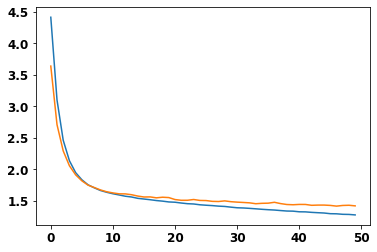

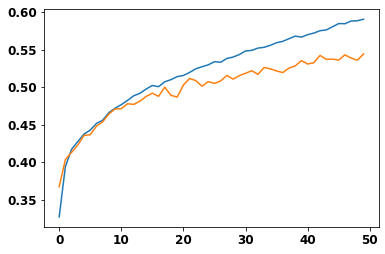

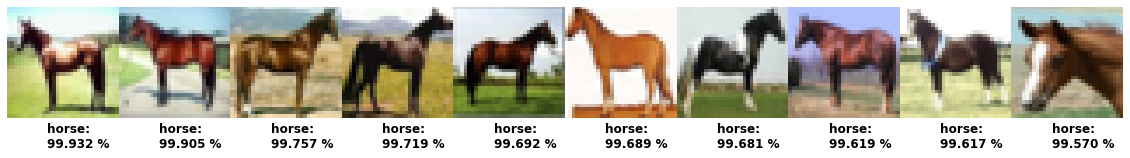

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dropout(rate=0.2))
model.add(Dense(3072, activation='gelu'))
model.add(Dense(512, activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=0.0001, l2=0.0001)))
model.add(Dense(10, activation='softmax'))

# optimizer = SGD(learning_rate = 0.01)
optimizer = Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name="Adam"
)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=100, validation_split = 0.2, verbose=2, callbacks=[callback])

score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

show_the_best_predictions(model, X_test, y_test)

### WRITE YOUR DESCRIPTION IN THIS CELL ###

---

I tried increase learning rate, accuracy increased. Then, I added dropout, regulatization, earlystopping - accuracy drastically decreased, so I increased batch size to 1000 and epochs to 200, added layers. Changed SGD to Adam, accuracy increased from 20% to 40% after 200 epochs. Decreased batch size, it reached 40% after 20 epochs, so batch size of 100 seems sufficient. It doesn't go higher 42%. First layer is relu, so I increased size of it to 3072. Time for one epoch to pass is long and increase is gradual, so I removed one layer and accuracy started to increase higher that 50%. Then I played with activation functions and layers. Changed relu to gelu at input layer, added one more dense layer and decreased regulizers' values. Accuracy reached 80%, but test_accuracy is stuck on 50%, so changes need to be made. After looking at val_accuracy I have decided to decrease learning rate and as a result it reached test_accuracy 54.46% and val_accuracy 0.54 highest so far, and it seems from the graph that after 50th epoch the model at the edge of beginning  to overfit, so I stopped here reaching 54.46% of test_accuracy and 1.4 test_loss

### Voluntary task: 
Implement one of the hyperparameter tunning algorithms discussed in the lecture, such as *Grid Search*, *Random Search* or more sophisticated ones. Some of these algorithms are already included in the Keras. Check the documentation